# 02 - Simple Liner Regression

<img width="200" src="https://i.imgur.com/hbPVe1T.png">


In [0]:
import tensorflow as tf

tf.enable_eager_execution()

# Hypothesis and Cost
### Hypothesis 
$$ H(x) = Wx + b $$


### Cost
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

* Which Hypothesis is better ?
* cost function: 편차제곱의 평균
* learning의 목표는 cost(W,b)를 최소화하는 (W,b)를 구하는 것


In [0]:
import tensorflow as tf
import numpy as np

x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

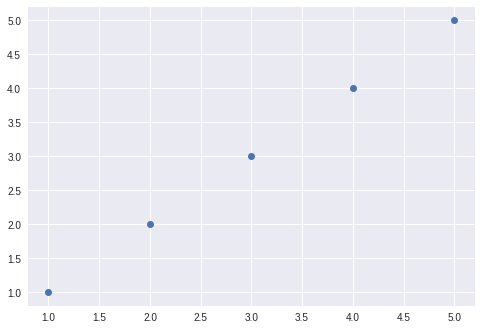

In [4]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o')

## Hypothesis

In [5]:
# hypothesis = W * x_data + b
W = tf.Variable(2.0)
b = tf.Variable(0.5)

W, b

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5>)

In [6]:
hypothesis = W * x_data + b
hypothesis

<tf.Tensor: id=25, shape=(5,), dtype=float32, numpy=array([ 2.5,  4.5,  6.5,  8.5, 10.5], dtype=float32)>

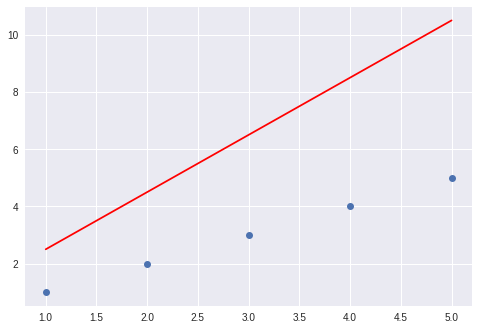

In [7]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')

## Cost

In [0]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

In [9]:
with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

W_grad, b_grad = tape.gradient(cost, [W, b])
W_grad, b_grad

(<tf.Tensor: id=69, shape=(), dtype=float32, numpy=25.0>,
 <tf.Tensor: id=62, shape=(), dtype=float32, numpy=7.0>)

## 파라미터 업데이트

In [10]:
learning_rate = 0.01

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.43>

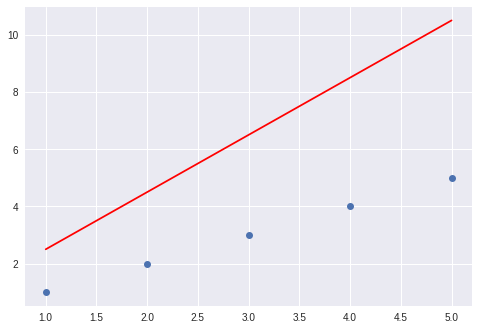

In [11]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')

## 여러 번 반복

    0|     2.452|     0.376| 45.660004
   10|     1.104|  0.003398|  0.206336
   20|     1.013|  -0.02091|  0.001026
   30|     1.007|  -0.02184|  0.000093
   40|     1.006|  -0.02123|  0.000083
   50|     1.006|  -0.02053|  0.000077
   60|     1.005|  -0.01984|  0.000072
   70|     1.005|  -0.01918|  0.000067
   80|     1.005|  -0.01854|  0.000063
   90|     1.005|  -0.01793|  0.000059


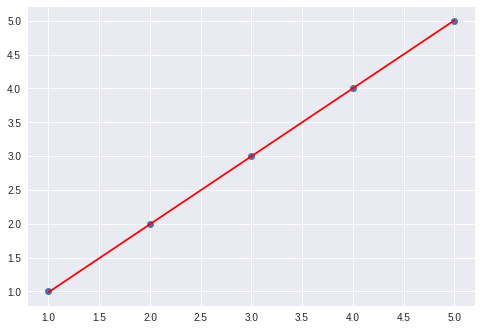

In [20]:

W = tf.Variable(2.9)
b = tf.Variable(0.5)

for i in range(100):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
        print("{:5}|{:10.4}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')

# predict

In [13]:
print(W * 5 + b)
print(W * 2.5 + b)

tf.Tensor(5.0066934, shape=(), dtype=float32)
tf.Tensor(2.4946523, shape=(), dtype=float32)
